# CandyParty task generation

In [1]:
# General importations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import string
from random import shuffle,seed,choices
from faker import Faker
from faker.providers.person.en import Provider
import networkx as nx
import itertools

from utils import Utils
from candy_party import CandyParty
from dataset_generator import DataSetGenerator

In [2]:
u = Utils()
dg = DataSetGenerator()

## Error test (low complexity)

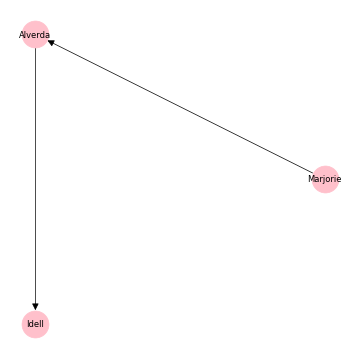


Causal context: A group of friends is going to a party where candies will be randomly distributed. Marjorie will be happy if she gets at least 6 candies. Alverda will be happy if she gets at least 6 candies or if Marjorie is happy. Idell will be happy if she gets at least 5 candies or if Alverda is happy. 

Sample context:  After distributing the candies, Marjorie gets 4 candies, Alverda gets 5 candies, and Idell gets 2 candies.

- Global cause-effect pairs: ('Marjorie', 'Idell')
- Local cause-effect pairs: [('Marjorie', 'Alverda'), ('Alverda', 'Idell')]
- Compositions: [[('Marjorie', 'Alverda'), ('Alverda', 'Idell')]]
- Causal functions: ['and', 'or', 'or']


In [3]:
size = [2,2]
tg = CandyParty(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
print("- Causal functions:", tg.causal_functions)

In [4]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())


- Factual queries:


{'Idell': {'Prompt': 'Is Idell happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Marjorie': 0, 'Alverda': 0, 'Idell': 0},
  'True exogenous': {'6IPJ': 0, 'VCOC': 0, 'BX6H': 0},
  'True response': 0},
 'Alverda': {'Prompt': 'Is Alverda happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Marjorie': 0, 'Alverda': 0, 'Idell': 0},
  'True exogenous': {'6IPJ': 0, 'VCOC': 0, 'BX6H': 0},
  'True response': 0}}

In [5]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = True):

-----------------------

-- ('Marjorie', 'Idell') --
Prompt: Now, suppose that Marjorie is happy regardless of all other circumstances. With this new assumption, is Idell happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Marjorie': 1, 'Alverda': 1, 'Idell': 1}
True exogenous: {'6IPJ': 0, 'VCOC': 0, 'BX6H': 0}
True response: 1

-----------------------

-- ('Marjorie', 'Alverda') --
Prompt: Now, suppose that Marjorie is happy regardless of all other circumstances. With this new assumption, is Alverda happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Marjorie': 1, 'Alverda': 1, 'Idell': 1}
True exogenous: {'6IPJ': 0, 'VCOC': 0, 'BX6H': 0}
True response: 1

-----------------------

-- ('Alverda', 'Idell') --
Prompt: Now, suppose that Alverda is happy regardless of all other circumstances. With this new assumption, is Idell happy? Begin your response with Yes or No a

In [6]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = False):

-----------------------

-- ('Marjorie', 'Idell') --
Prompt: Now, suppose that Marjorie is not happy regardless of all other circumstances. With this new assumption, is Idell happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Marjorie': 0, 'Alverda': 0, 'Idell': 0}
True exogenous: {'6IPJ': 0, 'VCOC': 0, 'BX6H': 0}
True response: 0

-----------------------

-- ('Marjorie', 'Alverda') --
Prompt: Now, suppose that Marjorie is not happy regardless of all other circumstances. With this new assumption, is Alverda happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Marjorie': 0, 'Alverda': 0, 'Idell': 0}
True exogenous: {'6IPJ': 0, 'VCOC': 0, 'BX6H': 0}
True response: 0

-----------------------

-- ('Alverda', 'Idell') --
Prompt: Now, suppose that Alverda is not happy regardless of all other circumstances. With this new assumption, is Idell happy? Begin your response wit

In [7]:
# Test observational data generation.
df_obs, df_noise = tg.sample_scm(n = 5,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

,Marjorie,Alverda,Idell
0,1,1,1
1,0,0,1
2,1,1,1
3,1,1,1
4,1,1,1


,6IPJ,VCOC,BX6H
0,1,1,0
1,0,0,1
2,1,0,1
3,1,1,1
4,1,1,1


In [8]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 1
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Marjorie = 1 --


,Marjorie,Alverda,Idell
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1


,6IPJ,VCOC,BX6H
0,1,1,0
1,0,0,1
2,1,0,1
3,1,1,1
4,1,1,1



-- Alverda = 1 --


,Marjorie,Alverda,Idell
0,1,1,1
1,0,1,1
2,1,1,1
3,1,1,1
4,1,1,1


,6IPJ,VCOC,BX6H
0,1,1,0
1,0,0,1
2,1,0,1
3,1,1,1
4,1,1,1


In [9]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 0
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Marjorie = 0 --


,Marjorie,Alverda,Idell
0,0,1,1
1,0,0,1
2,0,0,1
3,0,1,1
4,0,1,1


,6IPJ,VCOC,BX6H
0,1,1,0
1,0,0,1
2,1,0,1
3,1,1,1
4,1,1,1



-- Alverda = 0 --


,Marjorie,Alverda,Idell
0,1,0,0
1,0,0,1
2,1,0,1
3,1,0,1
4,1,0,1


,6IPJ,VCOC,BX6H
0,1,1,0
1,0,0,1
2,1,0,1
3,1,1,1
4,1,1,1


## Error test (moderate complexity)

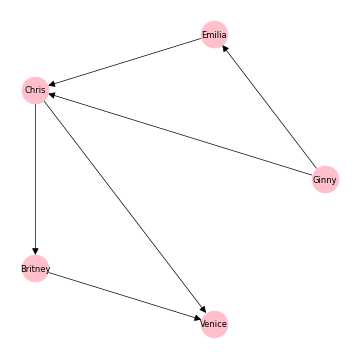


Causal context: A group of friends is going to a party where candies will be randomly distributed. Ginny will be happy if she gets at least 5 candies. Emilia will be happy if she gets at least 4 candies and Ginny is happy. Chris will be happy if she gets at least 8 candies or if Ginny is happy or if Emilia is happy. Britney will be happy if she gets at least 5 candies and Chris is happy. Venice will be happy if she gets at least 5 candies or if Chris is happy or if Britney is happy. 

Sample context:  After distributing the candies, Ginny gets 7 candies, Emilia gets 4 candies, Chris gets 8 candies, Britney gets 3 candies, and Venice gets 4 candies.

- Global cause-effect pairs: ('Ginny', 'Venice')
- Local cause-effect pairs: [('Ginny', 'Chris'), ('Chris', 'Venice')]
- Compositions: [[('Ginny', 'Chris'), ('Chris', 'Venice')]]
- Causal functions: ['or', 'and', 'or', 'and', 'or']


In [10]:
size = [3,3]
tg = CandyParty(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
print("- Causal functions:", tg.causal_functions)

In [11]:
print()
print("- Factual queries:")
display(tg.get_factual_queries())


- Factual queries:


{'Venice': {'Prompt': 'Is Venice happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Ginny': 1,
   'Emilia': 1,
   'Chris': 1,
   'Britney': 0,
   'Venice': 1},
  'True exogenous': {'BYCO': 1, 'PLSU': 1, '7CS7': 1, 'L1BR': 0, 'ZC63': 0},
  'True response': 1},
 'Chris': {'Prompt': 'Is Chris happy? Begin your response with Yes or No and be as concise as possible.',
  'True endogenous': {'Ginny': 1,
   'Emilia': 1,
   'Chris': 1,
   'Britney': 0,
   'Venice': 1},
  'True exogenous': {'BYCO': 1, 'PLSU': 1, '7CS7': 1, 'L1BR': 0, 'ZC63': 0},
  'True response': 1}}

In [12]:
cf_1, cf_0 = tg.get_counterfactual_queries()
print("- Counterfactual queries (cause = True):")
for key,val in cf_1.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = True):

-----------------------

-- ('Ginny', 'Venice') --
Prompt: Now, suppose that Ginny is happy regardless of all other circumstances. With this new assumption, is Venice happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Ginny': 1, 'Emilia': 1, 'Chris': 1, 'Britney': 0, 'Venice': 1}
True exogenous: {'BYCO': 1, 'PLSU': 1, '7CS7': 1, 'L1BR': 0, 'ZC63': 0}
True response: 1

-----------------------

-- ('Ginny', 'Chris') --
Prompt: Now, suppose that Ginny is happy regardless of all other circumstances. With this new assumption, is Chris happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Ginny': 1, 'Emilia': 1, 'Chris': 1, 'Britney': 0, 'Venice': 1}
True exogenous: {'BYCO': 1, 'PLSU': 1, '7CS7': 1, 'L1BR': 0, 'ZC63': 0}
True response: 1

-----------------------

-- ('Chris', 'Venice') --
Prompt: Now, suppose that Chris is happy regardless of all other circumstances. With 

In [13]:
print("- Counterfactual queries (cause = False):")
for key,val in cf_0.items():
    print("\n-----------------------")
    print("\n-- {} --".format(key))
    print("Prompt:", val.get("Prompt"))
    print("True endogenous:", val.get("True endogenous"))
    print("True exogenous:", val.get("True exogenous"))
    print("True response:", val.get("True response"))
print("\n-----------------------")

- Counterfactual queries (cause = False):

-----------------------

-- ('Ginny', 'Venice') --
Prompt: Now, suppose that Ginny is not happy regardless of all other circumstances. With this new assumption, is Venice happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Ginny': 0, 'Emilia': 0, 'Chris': 1, 'Britney': 0, 'Venice': 1}
True exogenous: {'BYCO': 1, 'PLSU': 1, '7CS7': 1, 'L1BR': 0, 'ZC63': 0}
True response: 1

-----------------------

-- ('Ginny', 'Chris') --
Prompt: Now, suppose that Ginny is not happy regardless of all other circumstances. With this new assumption, is Chris happy? Begin your response with Yes or No and be as concise as possible.
True endogenous: {'Ginny': 0, 'Emilia': 0, 'Chris': 1, 'Britney': 0, 'Venice': 1}
True exogenous: {'BYCO': 1, 'PLSU': 1, '7CS7': 1, 'L1BR': 0, 'ZC63': 0}
True response: 1

-----------------------

-- ('Chris', 'Venice') --
Prompt: Now, suppose that Chris is not happy regardless of all other circums

In [14]:
# Test observational data generation.
df_obs, df_noise = tg.sample_scm(n = 5,
                                 intervene_node = None,
                                 intervene_value = 0)
display(df_obs.head())
display(df_noise.head())

,Ginny,Emilia,Chris,Britney,Venice
0,1,0,1,1,1
1,1,1,1,0,1
2,0,0,1,0,1
3,0,0,0,0,0
4,0,0,1,1,1


,BYCO,PLSU,7CS7,L1BR,ZC63
0,1,0,1,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,0,1,0
4,0,0,1,1,0


In [15]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 1
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Ginny = 1 --


,Ginny,Emilia,Chris,Britney,Venice
0,1,0,1,1,1
1,1,1,1,0,1
2,1,1,1,0,1
3,1,0,1,1,1
4,1,0,1,1,1


,BYCO,PLSU,7CS7,L1BR,ZC63
0,1,0,1,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,0,1,0
4,0,0,1,1,0



-- Chris = 1 --


,Ginny,Emilia,Chris,Britney,Venice
0,1,0,1,1,1
1,1,1,1,0,1
2,0,0,1,0,1
3,0,0,1,1,1
4,0,0,1,1,1


,BYCO,PLSU,7CS7,L1BR,ZC63
0,1,0,1,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,0,1,0
4,0,0,1,1,0


In [16]:
# Test counterfactual data generation.
causes = set([x[0] for x in [tg.get_global()]+tg.get_local()])
intervene_value = 0
for cause in causes:
    print("\n-- {} = {} --".format(cause,intervene_value))
    df_obs, df_noise = tg.sample_scm(n = 5,
                                     intervene_node = cause,
                                     intervene_value = intervene_value)
    display(df_obs.head())
    display(df_noise.head())


-- Ginny = 0 --


,Ginny,Emilia,Chris,Britney,Venice
0,0,0,1,1,1
1,0,0,1,0,1
2,0,0,1,0,1
3,0,0,0,0,0
4,0,0,1,1,1


,BYCO,PLSU,7CS7,L1BR,ZC63
0,1,0,1,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,0,1,0
4,0,0,1,1,0



-- Chris = 0 --


,Ginny,Emilia,Chris,Britney,Venice
0,1,0,0,0,0
1,1,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,0
4,0,0,0,0,0


,BYCO,PLSU,7CS7,L1BR,ZC63
0,1,0,1,1,0
1,1,1,1,0,0
2,0,1,1,0,1
3,0,0,0,1,0
4,0,0,1,1,0


In [17]:
glo = [tg.get_global()]
loc = tg.get_local()
comp = tg.get_compositions()

print(glo)
print(loc)
print(comp)

[('Ginny', 'Venice')]
[('Ginny', 'Chris'), ('Chris', 'Venice')]
[[('Ginny', 'Chris'), ('Chris', 'Venice')]]


In [18]:
# Get PNS and compare to ATE.
results_dict = dict()
for n in [5,10,50,100,500,1000,5000]:
    pair_dict = dict()
    for pair in glo+loc:
        df_cf, df_noise = tg.sample_scm(n = n,
                                        intervene_node = pair[0],
                                        intervene_value = 1)
        df_cf.rename(columns={pair[1]: 'True (cause = True)'}, inplace = True)
        df_cf_0, df_noise = tg.sample_scm(n = n,
                                          intervene_node = pair[0],
                                          intervene_value = 0)
        df_cf["True (cause = False)"] = df_cf_0[pair[1]]
        display(df_cf.head(5))
        print("\n-- {} | n = {} --".format(pair,n))
        pns = dg.get_pns_ate(df_cf)
        pair_dict[pair] = pns
    results_dict[n] = pair_dict

,Ginny,Emilia,Chris,Britney,True (cause = True),True (cause = False)
0,1,0,1,1,1,1
1,1,1,1,0,1,1
2,1,1,1,0,1,1
3,1,0,1,1,1,0
4,1,0,1,1,1,1



-- ('Ginny', 'Venice') | n = 5 --
-- PNS = 0.2 | ATE = 0.19999999999999996 --


,Ginny,Emilia,True (cause = True),Britney,Venice,True (cause = False)
0,1,0,1,1,1,1
1,1,1,1,0,1,1
2,1,1,1,0,1,1
3,1,0,1,1,1,0
4,1,0,1,1,1,1



-- ('Ginny', 'Chris') | n = 5 --
-- PNS = 0.2 | ATE = 0.19999999999999996 --


,Ginny,Emilia,Chris,Britney,True (cause = True),True (cause = False)
0,1,0,1,1,1,0
1,1,1,1,0,1,0
2,0,0,1,0,1,1
3,0,0,1,1,1,0
4,0,0,1,1,1,0



-- ('Chris', 'Venice') | n = 5 --
-- PNS = 0.8 | ATE = 0.8 --


,Ginny,Emilia,Chris,Britney,True (cause = True),True (cause = False)
0,1,0,1,0,1,1
1,1,1,1,1,1,1
2,1,1,1,0,1,1
3,1,1,1,0,1,1
4,1,1,1,1,1,1



-- ('Ginny', 'Venice') | n = 10 --
-- PNS = 0.0 | ATE = 0.0 --


,Ginny,Emilia,True (cause = True),Britney,Venice,True (cause = False)
0,1,0,1,0,1,1
1,1,1,1,1,1,1
2,1,1,1,0,1,0
3,1,1,1,0,1,1
4,1,1,1,1,1,1



-- ('Ginny', 'Chris') | n = 10 --
-- PNS = 0.1 | ATE = 0.09999999999999998 --


,Ginny,Emilia,Chris,Britney,True (cause = True),True (cause = False)
0,1,0,1,0,1,0
1,1,1,1,1,1,0
2,0,0,1,0,1,1
3,0,0,1,0,1,1
4,0,0,1,1,1,1



-- ('Chris', 'Venice') | n = 10 --
-- PNS = 0.4 | ATE = 0.4 --


,Ginny,Emilia,Chris,Britney,True (cause = True),True (cause = False)
0,1,0,1,0,1,1
1,1,0,1,1,1,1
2,1,0,1,0,1,0
3,1,1,1,1,1,0
4,1,0,1,0,1,1



-- ('Ginny', 'Venice') | n = 50 --
-- PNS = 0.12 | ATE = 0.12 --


,Ginny,Emilia,True (cause = True),Britney,Venice,True (cause = False)
0,1,0,1,0,1,1
1,1,0,1,1,1,0
2,1,0,1,0,1,0
3,1,1,1,1,1,0
4,1,0,1,0,1,1



-- ('Ginny', 'Chris') | n = 50 --
-- PNS = 0.28 | ATE = 0.28 --


,Ginny,Emilia,Chris,Britney,True (cause = True),True (cause = False)
0,1,0,1,0,1,0
1,1,0,1,1,1,1
2,0,0,1,0,1,0
3,0,0,1,1,1,0
4,0,0,1,0,1,1



-- ('Chris', 'Venice') | n = 50 --
-- PNS = 0.48 | ATE = 0.48 --


,Ginny,Emilia,Chris,Britney,True (cause = True),True (cause = False)
0,1,0,1,0,1,1
1,1,1,1,0,1,1
2,1,1,1,0,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1



-- ('Ginny', 'Venice') | n = 100 --
-- PNS = 0.06 | ATE = 0.06000000000000005 --


,Ginny,Emilia,True (cause = True),Britney,Venice,True (cause = False)
0,1,0,1,0,1,1
1,1,1,1,0,1,1
2,1,1,1,0,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,0



-- ('Ginny', 'Chris') | n = 100 --
-- PNS = 0.17 | ATE = 0.17000000000000004 --


,Ginny,Emilia,Chris,Britney,True (cause = True),True (cause = False)
0,1,0,1,0,1,1
1,1,1,1,0,1,0
2,0,0,1,0,1,1
3,0,0,1,1,1,0
4,0,0,1,1,1,1



-- ('Chris', 'Venice') | n = 100 --
-- PNS = 0.49 | ATE = 0.49 --


,Ginny,Emilia,Chris,Britney,True (cause = True),True (cause = False)
0,1,0,1,1,1,1
1,1,0,1,0,1,1
2,1,0,1,1,1,1
3,1,0,1,1,1,1
4,1,1,1,1,1,1



-- ('Ginny', 'Venice') | n = 500 --
-- PNS = 0.108 | ATE = 0.10799999999999998 --


,Ginny,Emilia,True (cause = True),Britney,Venice,True (cause = False)
0,1,0,1,1,1,1
1,1,0,1,0,1,1
2,1,0,1,1,1,1
3,1,0,1,1,1,1
4,1,1,1,1,1,0



-- ('Ginny', 'Chris') | n = 500 --
-- PNS = 0.228 | ATE = 0.22799999999999998 --


,Ginny,Emilia,Chris,Britney,True (cause = True),True (cause = False)
0,1,0,1,1,1,1
1,1,0,1,0,1,0
2,0,0,1,1,1,1
3,0,0,1,1,1,0
4,0,0,1,1,1,1



-- ('Chris', 'Venice') | n = 500 --
-- PNS = 0.488 | ATE = 0.488 --


,Ginny,Emilia,Chris,Britney,True (cause = True),True (cause = False)
0,1,0,1,0,1,1
1,1,0,1,1,1,1
2,1,0,1,0,1,0
3,1,0,1,1,1,1
4,1,1,1,1,1,0



-- ('Ginny', 'Venice') | n = 1000 --
-- PNS = 0.09 | ATE = 0.08999999999999997 --


,Ginny,Emilia,True (cause = True),Britney,Venice,True (cause = False)
0,1,0,1,0,1,1
1,1,0,1,1,1,1
2,1,0,1,0,1,0
3,1,0,1,1,1,1
4,1,1,1,1,1,0



-- ('Ginny', 'Chris') | n = 1000 --
-- PNS = 0.196 | ATE = 0.19599999999999995 --


,Ginny,Emilia,Chris,Britney,True (cause = True),True (cause = False)
0,1,0,1,0,1,0
1,1,0,1,1,1,1
2,0,0,1,0,1,0
3,0,0,1,1,1,1
4,0,0,1,1,1,0



-- ('Chris', 'Venice') | n = 1000 --
-- PNS = 0.508 | ATE = 0.508 --


,Ginny,Emilia,Chris,Britney,True (cause = True),True (cause = False)
0,1,1,1,0,1,1
1,1,1,1,1,1,1
2,1,0,1,1,1,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0



-- ('Ginny', 'Venice') | n = 5000 --
-- PNS = 0.096 | ATE = 0.09599999999999997 --


,Ginny,Emilia,True (cause = True),Britney,Venice,True (cause = False)
0,1,1,1,0,1,1
1,1,1,1,1,1,1
2,1,0,1,1,1,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0



-- ('Ginny', 'Chris') | n = 5000 --
-- PNS = 0.1944 | ATE = 0.19440000000000002 --


,Ginny,Emilia,Chris,Britney,True (cause = True),True (cause = False)
0,1,1,1,0,1,0
1,1,1,1,1,1,0
2,0,0,1,1,1,1
3,0,0,1,0,1,0
4,0,0,1,0,1,0



-- ('Chris', 'Venice') | n = 5000 --
-- PNS = 0.5086 | ATE = 0.5085999999999999 --


In [19]:
for n,res in results_dict.items():
    print("\n-- n = {} --".format(n))
    comp_pns = 1
    for pair,pns in res.items():
        if pair == glo[0]:
            global_pns = pns
        else:
            comp_pns *= pns
    print("Global PNS  =", global_pns)
    print("Composition =", comp_pns)


-- n = 5 --
Global PNS  = 0.2
Composition = 0.16000000000000003

-- n = 10 --
Global PNS  = 0.0
Composition = 0.04000000000000001

-- n = 50 --
Global PNS  = 0.12
Composition = 0.13440000000000002

-- n = 100 --
Global PNS  = 0.06
Composition = 0.0833

-- n = 500 --
Global PNS  = 0.108
Composition = 0.111264

-- n = 1000 --
Global PNS  = 0.09
Composition = 0.099568

-- n = 5000 --
Global PNS  = 0.096
Composition = 0.09887184


In [20]:
results_dict

{5: {('Ginny', 'Venice'): 0.2,
  ('Ginny', 'Chris'): 0.2,
  ('Chris', 'Venice'): 0.8},
 10: {('Ginny', 'Venice'): 0.0,
  ('Ginny', 'Chris'): 0.1,
  ('Chris', 'Venice'): 0.4},
 50: {('Ginny', 'Venice'): 0.12,
  ('Ginny', 'Chris'): 0.28,
  ('Chris', 'Venice'): 0.48},
 100: {('Ginny', 'Venice'): 0.06,
  ('Ginny', 'Chris'): 0.17,
  ('Chris', 'Venice'): 0.49},
 500: {('Ginny', 'Venice'): 0.108,
  ('Ginny', 'Chris'): 0.228,
  ('Chris', 'Venice'): 0.488},
 1000: {('Ginny', 'Venice'): 0.09,
  ('Ginny', 'Chris'): 0.196,
  ('Chris', 'Venice'): 0.508},
 5000: {('Ginny', 'Venice'): 0.096,
  ('Ginny', 'Chris'): 0.1944,
  ('Chris', 'Venice'): 0.5086}}

## Error test (high complexity)

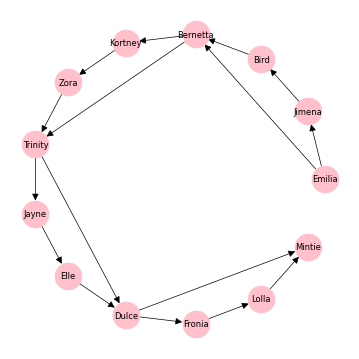


Causal context: A group of friends is going to a party where candies will be randomly distributed. Emilia will be happy if she gets at least 8 candies. Jimena will be happy if she gets at least 5 candies and Emilia is happy. Bird will be happy if she gets at least 8 candies or if Jimena is happy. Bernetta will be happy if she gets at least 4 candies and Emilia is happy and Bird is happy. Kortney will be happy if she gets at least 6 candies and Bernetta is happy. Zora will be happy if she gets at least 6 candies or if Kortney is happy. Trinity will be happy if she gets at least 7 candies and Bernetta is happy and Zora is happy. Jayne will be happy if she gets at least 6 candies and Trinity is happy. Elle will be happy if she gets at least 6 candies or if Jayne is happy. Dulce will be happy if she gets at least 5 candies or if Trinity is happy or if Elle is happy. Fronia will be happy if she gets at least 5 candies or if Dulce is happy. Lolla will be happy if she gets at least 5 candies

In [21]:
size = [4,4,4,4]
tg = CandyParty(n_per_bcc = size, 
                bcc_types = ["cycle"]*len(size))
causal_context = tg.get_causal_context()
sample_context = tg.get_sample_context()
print()
print("Causal context:", causal_context)
print()
print("Sample context:", sample_context)
print()
print("- Global cause-effect pairs:", tg.get_global())
print("- Local cause-effect pairs:", tg.get_local())
print("- Compositions:", tg.get_compositions())
print("- Causal functions:", tg.causal_functions)

## Generate dataset

In [22]:
# x levels of graphical complexity (captured by BCC size).
# y tasks per graphical complexity level.
# z samples per task.
# w replicates per sample.
# = x*y*z*w subtasks.
graph_sizes = [[5,5,5]]
n_tasks_per_size = 1
n_samples_per_task = 5000
reps_per_sample = None
bcc_type = "wheel"

df = dg.get_dataset(task_generator = CandyParty,
                    graph_sizes = graph_sizes,
                    bcc_type = bcc_type,
                    n_tasks_per_size = n_tasks_per_size,
                    n_samples_per_task = n_samples_per_task, 
                    reps_per_sample = reps_per_sample)

display(df)

,Task ID,Context ID,Sample ID,Nodes per BCC,DAG adjacency matrix,DAG nodes,CCT adjacency matrix,CCT nodes,Exogenous variables,Bernoulli parameters,Global quantity,Local quantities,Compositions,Causal context,Sample context,Factual queries,Interventional queries (cause = True),Interventional queries (cause = False)
0,0.0,0,0,"[5, 5, 5]","[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[Chyna, Myah, Cleda, Cathie, Violette, Tia, De...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Chyna, Violette, Lolita, Lala]","[YVQG, BI00, P1B6, 2EXX, 5IU6, LM7K, HVJT, EPM...","[0.7, 0.5, 0.4, 0.8, 0.7, 0.5, 0.7, 0.4, 0.5, ...","(Chyna, Lala)","[(Chyna, Violette), (Chyna, Lolita), (Violette...","[[(Chyna, Violette), (Violette, Lolita), (Loli...",A group of friends is going to a party where c...,"After distributing the candies, Chyna gets 3 ...",{'Lala': {'Prompt': 'Is Lala happy? Begin your...,"{('Chyna', 'Lala'): {'Prompt': 'Now, suppose t...","{('Chyna', 'Lala'): {'Prompt': 'Now, suppose t..."
1,0.1,0,1,"[5, 5, 5]","[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[Chyna, Myah, Cleda, Cathie, Violette, Tia, De...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Chyna, Violette, Lolita, Lala]","[YVQG, BI00, P1B6, 2EXX, 5IU6, LM7K, HVJT, EPM...","[0.7, 0.5, 0.4, 0.8, 0.7, 0.5, 0.7, 0.4, 0.5, ...","(Chyna, Lala)","[(Chyna, Violette), (Chyna, Lolita), (Violette...","[[(Chyna, Violette), (Violette, Lolita), (Loli...",A group of friends is going to a party where c...,"After distributing the candies, Chyna gets 7 ...",{'Lala': {'Prompt': 'Is Lala happy? Begin your...,"{('Chyna', 'Lala'): {'Prompt': 'Now, suppose t...","{('Chyna', 'Lala'): {'Prompt': 'Now, suppose t..."
2,0.2,0,2,"[5, 5, 5]","[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[Chyna, Myah, Cleda, Cathie, Violette, Tia, De...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Chyna, Violette, Lolita, Lala]","[YVQG, BI00, P1B6, 2EXX, 5IU6, LM7K, HVJT, EPM...","[0.7, 0.5, 0.4, 0.8, 0.7, 0.5, 0.7, 0.4, 0.5, ...","(Chyna, Lala)","[(Chyna, Violette), (Chyna, Lolita), (Violette...","[[(Chyna, Violette), (Violette, Lolita), (Loli...",A group of friends is going to a party where c...,"After distributing the candies, Chyna gets 8 ...",{'Lala': {'Prompt': 'Is Lala happy? Begin your...,"{('Chyna', 'Lala'): {'Prompt': 'Now, suppose t...","{('Chyna', 'Lala'): {'Prompt': 'Now, suppose t..."
3,0.3,0,3,"[5, 5, 5]","[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[Chyna, Myah, Cleda, Cathie, Violette, Tia, De...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Chyna, Violette, Lolita, Lala]","[YVQG, BI00, P1B6, 2EXX, 5IU6, LM7K, HVJT, EPM...","[0.7, 0.5, 0.4, 0.8, 0.7, 0.5, 0.7, 0.4, 0.5, ...","(Chyna, Lala)","[(Chyna, Violette), (Chyna, Lolita), (Violette...","[[(Chyna, Violette), (Violette, Lolita), (Loli...",A group of friends is going to a party where c...,"After distributing the candies, Chyna gets 8 ...",{'Lala': {'Prompt': 'Is Lala happy? Begin your...,"{('Chyna', 'Lala'): {'Prompt': 'Now, suppose t...","{('Chyna', 'Lala'): {'Prompt': 'Now, suppose t..."
4,0.4,0,4,"[5, 5, 5]","[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[Chyna, Myah, Cleda, Cathie, Violette, Tia, De...","[[0, 1, 1, 1], [0, 0, 1, 1], [0, 0, 0, 1], [0,...","[Chyna, Violette, Lolita, Lala]","[YVQG, BI00, P1B6, 2EXX, 5IU6, LM7K, HVJT, EPM...","[0.7, 0.5, 0.4, 0.8, 0.7, 0.5, 0.7, 0.4, 0.5, ...","(Chyna, Lala)","[(Chyna, Violette), (Chyna, Lolita), (Violette...","[[(Chyna, Violette), (Violette, Lolita), (Loli...",A group of friends is going to a party where c...,"After distributing the candies, Chyna gets 5 ...",{'Lala': {'Prompt': 'Is Lala happy? Begin your...,"{('Chyna', 'Lala'): {'Prompt': 'Now, suppose t...","{('Chyna', 'Lala'): {'Prompt': 'Now, suppose t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.4995,0,4995,"[5, 5, 5]","[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, ...","[Chyna, Myah, Cleda, Cathie, Violette, Tia, De...","[[0, 1, 1, 1], [0

In [23]:
# Process prompts.
df_factual, df_cf = dg.process_prompts()
display(df_factual)
display(df_cf)

,Task ID,Context ID,Sample ID,Nodes per BCC,Effect,Context,Question,True
0,0.0,0,0,"[5, 5, 5]",Lala,A group of friends is going to a party where c...,Is Lala happy? Begin your response with Yes or...,1
1,0.0,0,0,"[5, 5, 5]",Violette,A group of friends is going to a party where c...,Is Violette happy? Begin your response with Ye...,1
2,0.0,0,0,"[5, 5, 5]",Lolita,A group of friends is going to a party where c...,Is Lolita happy? Begin your response with Yes ...,1
3,0.1,0,1,"[5, 5, 5]",Lala,A group of friends is going to a party where c...,Is Lala happy? Begin your response with Yes or...,0
4,0.1,0,1,"[5, 5, 5]",Violette,A group of friends is going to a party where c...,Is Violette happy? Begin your response with Ye...,1
...,...,...,...,...,...,...,...,...
14995,0.4998,0,4998,"[5, 5, 5]",Violette,A group of friends is going to a party where c...,Is Violette happy? Begin your response with Ye...,1
14996,0.4998,0,4998,"[5, 5, 5]",Lolita,A group of friends is going to a party where c...,Is Lolita happy? Begin your response with Yes ...,0
14997,0.4999,0,4999,"[5, 5, 5]",Lala,A group of friends is going to a party where c...,Is Lala happy? Begin your response with Yes or...,0
14998,0.4999,0,4999,"[5, 5, 5]",Violette,A group of friends is going to a party where c...,Is Violette happy? Begin your response with Ye...,1


,Task ID,Context ID,Sample ID,Nodes per BCC,Cause-effect pair,Cause,Effect,Context,Question (cause = True),True (cause = True),Question (cause = False),True (cause = False)
0,0.0,0,0,"[5, 5, 5]","(Chyna, Lala)",Chyna,Lala,A group of friends is going to a party where c...,"Now, suppose that Chyna is happy regardless of...",1,"Now, suppose that Chyna is not happy regardles...",1
1,0.0,0,0,"[5, 5, 5]","(Chyna, Violette)",Chyna,Violette,A group of friends is going to a party where c...,"Now, suppose that Chyna is happy regardless of...",1,"Now, suppose that Chyna is not happy regardles...",1
2,0.0,0,0,"[5, 5, 5]","(Chyna, Lolita)",Chyna,Lolita,A group of friends is going to a party where c...,"Now, suppose that Chyna is happy regardless of...",1,"Now, suppose that Chyna is not happy regardles...",1
3,0.0,0,0,"[5, 5, 5]","(Violette, Lolita)",Violette,Lolita,A group of friends is going to a party where c...,"Now, suppose that Violette is happy regardless...",1,"Now, suppose that Violette is not happy regard...",0
4,0.0,0,0,"[5, 5, 5]","(Violette, Lala)",Violette,Lala,A group of friends is going to a party where c...,"Now, suppose that Violette is happy regardless...",1,"Now, suppose that Violette is not happy regard...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.4999,0,4999,"[5, 5, 5]","(Chyna, Violette)",Chyna,Violette,A group of friends is going to a party where c...,"Now, suppose that Chyna is happy regardless of...",1,"Now, suppose that Chyna is not happy regardles...",1
29996,0.4999,0,4999,"[5, 5, 5]","(Chyna, Lolita)",Chyna,Lolita,A group of friends is going to a party where c...,"Now, suppose that Chyna is happy regardless of...",0,"Now, suppose that Chyna is not happy regardles...",0
29997,0.4999,0,4999,"[5, 5, 5]","(Violette, Lolita)",Violette,Lolita,A group of friends is going to a party where c...,"Now, suppose that Violette is happy regardless...",0,"Now, suppose that Violette is not happy regard...",0
29998,0.4999,0,4999,"[5, 5, 5]","(Violette, Lala)",Violette,Lala,A group of friends is going to a party where c...,"Now, suppose that Violette is happy regardless...",0,"Now, suppose that Violette is not happy regard...",0


In [24]:
df_factual["True"].value_counts()

True
0    8243
1    6757
Name: count, dtype: int64

In [25]:
pns_dict = dg.get_pns_dict(verbose = True)
pns_dict

-- PNS = 0.026 | ATE = 0.025999999999999995 --
-- PNS = 0.1422 | ATE = 0.1422 --
-- PNS = 0.0382 | ATE = 0.03820000000000001 --
-- PNS = 0.2508 | ATE = 0.2508 --
-- PNS = 0.1618 | ATE = 0.1618 --
-- PNS = 0.6398 | ATE = 0.6398 --


{0: {"('Chyna', 'Lala')": 0.026,
  "('Chyna', 'Violette')": 0.1422,
  "('Chyna', 'Lolita')": 0.0382,
  "('Violette', 'Lolita')": 0.2508,
  "('Violette', 'Lala')": 0.1618,
  "('Lolita', 'Lala')": 0.6398,
  "[('Chyna', 'Violette'), ('Violette', 'Lolita'), ('Lolita', 'Lala')]": 0.022817673648000004,
  "[('Chyna', 'Violette'), ('Violette', 'Lala')]": 0.023007959999999997,
  "[('Chyna', 'Lolita'), ('Lolita', 'Lala')]": 0.02444036}}

In [26]:
threshold_dict = dg.get_internal_consistency_thresholds(multiplier = 1.1)
threshold_dict

{0: {"[('Chyna', 'Violette'), ('Violette', 'Lolita'), ('Lolita', 'Lala')]": 0.1346368841230767,
  "[('Chyna', 'Violette'), ('Violette', 'Lala')]": 0.12658630769230778,
  "[('Chyna', 'Lolita'), ('Lolita', 'Lala')]": 0.06598476923076914}}

In [27]:
df_cf[df_cf["Context ID"] == 0]

,Task ID,Context ID,Sample ID,Nodes per BCC,Cause-effect pair,Cause,Effect,Context,Question (cause = True),True (cause = True),Question (cause = False),True (cause = False)
0,0.0,0,0,"[5, 5, 5]","(Chyna, Lala)",Chyna,Lala,A group of friends is going to a party where c...,"Now, suppose that Chyna is happy regardless of...",1,"Now, suppose that Chyna is not happy regardles...",1
1,0.0,0,0,"[5, 5, 5]","(Chyna, Violette)",Chyna,Violette,A group of friends is going to a party where c...,"Now, suppose that Chyna is happy regardless of...",1,"Now, suppose that Chyna is not happy regardles...",1
2,0.0,0,0,"[5, 5, 5]","(Chyna, Lolita)",Chyna,Lolita,A group of friends is going to a party where c...,"Now, suppose that Chyna is happy regardless of...",1,"Now, suppose that Chyna is not happy regardles...",1
3,0.0,0,0,"[5, 5, 5]","(Violette, Lolita)",Violette,Lolita,A group of friends is going to a party where c...,"Now, suppose that Violette is happy regardless...",1,"Now, suppose that Violette is not happy regard...",0
4,0.0,0,0,"[5, 5, 5]","(Violette, Lala)",Violette,Lala,A group of friends is going to a party where c...,"Now, suppose that Violette is happy regardless...",1,"Now, suppose that Violette is not happy regard...",0
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.4999,0,4999,"[5, 5, 5]","(Chyna, Violette)",Chyna,Violette,A group of friends is going to a party where c...,"Now, suppose that Chyna is happy regardless of...",1,"Now, suppose that Chyna is not happy regardles...",1
29996,0.4999,0,4999,"[5, 5, 5]","(Chyna, Lolita)",Chyna,Lolita,A group of friends is going to a party where c...,"Now, suppose that Chyna is happy regardless of...",0,"Now, suppose that Chyna is not happy regardles...",0
29997,0.4999,0,4999,"[5, 5, 5]","(Violette, Lolita)",Violette,Lolita,A group of friends is going to a party where c...,"Now, suppose that Violette is happy regardless...",0,"Now, suppose that Violette is not happy regard...",0
29998,0.4999,0,4999,"[5, 5, 5]","(Violette, Lala)",Violette,Lala,A group of friends is going to a party where c...,"Now, suppose that Violette is happy regardless...",0,"Now, suppose that Violette is not happy regard...",0


In [28]:
df_cf[df_cf["Task ID"] == "0.0"]

,Task ID,Context ID,Sample ID,Nodes per BCC,Cause-effect pair,Cause,Effect,Context,Question (cause = True),True (cause = True),Question (cause = False),True (cause = False)
0,0.0,0,0,"[5, 5, 5]","(Chyna, Lala)",Chyna,Lala,A group of friends is going to a party where c...,"Now, suppose that Chyna is happy regardless of...",1,"Now, suppose that Chyna is not happy regardles...",1
1,0.0,0,0,"[5, 5, 5]","(Chyna, Violette)",Chyna,Violette,A group of friends is going to a party where c...,"Now, suppose that Chyna is happy regardless of...",1,"Now, suppose that Chyna is not happy regardles...",1
2,0.0,0,0,"[5, 5, 5]","(Chyna, Lolita)",Chyna,Lolita,A group of friends is going to a party where c...,"Now, suppose that Chyna is happy regardless of...",1,"Now, suppose that Chyna is not happy regardles...",1
3,0.0,0,0,"[5, 5, 5]","(Violette, Lolita)",Violette,Lolita,A group of friends is going to a party where c...,"Now, suppose that Violette is happy regardless...",1,"Now, suppose that Violette is not happy regard...",0
4,0.0,0,0,"[5, 5, 5]","(Violette, Lala)",Violette,Lala,A group of friends is going to a party where c...,"Now, suppose that Violette is happy regardless...",1,"Now, suppose that Violette is not happy regard...",0
5,0.0,0,0,"[5, 5, 5]","(Lolita, Lala)",Lolita,Lala,A group of friends is going to a party where c...,"Now, suppose that Lolita is happy regardless o...",1,"Now, suppose that Lolita is not happy regardle...",0


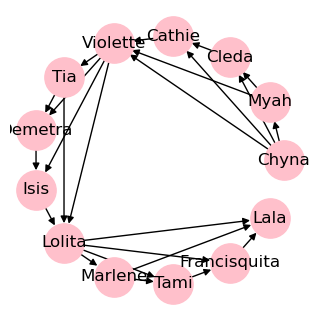

In [29]:
#array_string = df[df["Task ID"] == "0.0"]["DAG adjacency matrix"][0]
names = df[df["Task ID"] == "0.0"]["DAG nodes"][0]
#adj = u.string_to_array(array_string)
adj = df[df["Task ID"] == "0.0"]["DAG adjacency matrix"][0]
u.plot_nx(adj, labels = names, figsize = (3,3), dpi = 100)

In [30]:
print(df_cf[df_cf["Task ID"] == "0.0"]["Context"][0])

A group of friends is going to a party where candies will be randomly distributed. Chyna will be happy if she gets at least 7 candies. Myah will be happy if she gets at least 5 candies or if Chyna is happy. Cleda will be happy if she gets at least 4 candies or if Chyna is happy or if Myah is happy. Cathie will be happy if she gets at least 8 candies and Chyna is happy and Cleda is happy. Violette will be happy if she gets at least 7 candies or if Chyna is happy or if Myah is happy or if Cathie is happy. Tia will be happy if she gets at least 5 candies and Violette is happy. Demetra will be happy if she gets at least 7 candies or if Violette is happy or if Tia is happy. Isis will be happy if she gets at least 4 candies or if Violette is happy or if Demetra is happy. Lolita will be happy if she gets at least 5 candies and Violette is happy and Tia is happy and Isis is happy. Marlene will be happy if she gets at least 8 candies and Lolita is happy. Tami will be happy if she gets at least 

## End of document